<a href="https://colab.research.google.com/github/kridtapon/Quantitative-Finance-Volatility-Analysis-Using-Python/blob/main/Quantitative_Finance_Volatility_Analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install arch QuantLib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 80.3 MB/s eta 0:00:00


In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model
import QuantLib as ql
import matplotlib.pyplot as plt

In [21]:
# Download historical data for a stock (e.g., S&P 500)
ticker = "SPY"
data = yf.download(ticker, start="2010-01-01", end="2024-01-01")

# Display first few rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2010-01-04,86.315987,113.330002,113.389999,111.510002,112.370003,118944600
2010-01-05,86.544464,113.629997,113.680000,112.849998,113.260002,111579900
2010-01-06,86.605370,113.709999,113.989998,113.430000,113.519997,116074400
2010-01-07,86.970985,114.190002,114.330002,113.180000,113.500000,131091100
2010-01-08,87.260414,114.570000,114.620003,113.660004,113.889999,126402800


In [22]:
# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Drop missing values
data.dropna(inplace=True)

# Display first few rows
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Returns
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,,
2010-01-05,86.544464,113.629997,113.680000,112.849998,113.260002,111579900,0.002647
2010-01-06,86.605370,113.709999,113.989998,113.430000,113.519997,116074400,0.000704
2010-01-07,86.970985,114.190002,114.330002,113.180000,113.500000,131091100,0.004222
2010-01-08,87.260414,114.570000,114.620003,113.660004,113.889999,126402800,0.003328
2010-01-11,87.382294,114.730003,115.129997,114.239998,115.080002,106375700,0.001397


In [24]:
data_clean = data.copy()
data_clean = data_clean.ffill()
data_clean.columns = ['Adj Close','Close','High','Low','Open','Volume','Returns']
data_clean
#data_clean.drop(['Date'], axis='columns', inplace=True)

,Adj Close,Close,High,Low,Open,Volume,Returns
Date,,,,,,,
2010-01-05,86.544464,113.629997,113.680000,112.849998,113.260002,111579900,0.002647
2010-01-06,86.605370,113.709999,113.989998,113.430000,113.519997,116074400,0.000704
2010-01-07,86.970985,114.190002,114.330002,113.180000,113.500000,131091100,0.004222
2010-01-08,87.260414,114.570000,114.620003,113.660004,113.889999,126402800,0.003328
2010-01-11,87.382294,114.730003,115.129997,114.239998,115.080002,106375700,0.001397
...,...,...,...,...,...,...,...
2023-12-22,469.225250,473.649994,475.380005,471.700012,473.859985,67126600,0.002010
2023-12-26,471.206543,475.649994,476.579987,473.989990,474.070007,55387000,0.004222
2023-12-27,472.058533,476.510010,476.660004,474.890015,475.440002,68000300,0.001808


In [59]:
data = data_clean.copy()
data

,Adj Close,Close,High,Low,Open,Volume,Returns
Date,,,,,,,
2010-01-05,86.544464,113.629997,113.680000,112.849998,113.260002,111579900,0.002647
2010-01-06,86.605370,113.709999,113.989998,113.430000,113.519997,116074400,0.000704
2010-01-07,86.970985,114.190002,114.330002,113.180000,113.500000,131091100,0.004222
2010-01-08,87.260414,114.570000,114.620003,113.660004,113.889999,126402800,0.003328
2010-01-11,87.382294,114.730003,115.129997,114.239998,115.080002,106375700,0.001397
...,...,...,...,...,...,...,...
2023-12-22,469.225250,473.649994,475.380005,471.700012,473.859985,67126600,0.002010
2023-12-26,471.206543,475.649994,476.579987,473.989990,474.070007,55387000,0.004222
2023-12-27,472.058533,476.510010,476.660004,474.890015,475.440002,68000300,0.001808


In [60]:
# Calculate rolling 30-day volatility
data['Volatility'] = data['Returns'].rolling(window=30).std() * np.sqrt(252)  # Annualize volatility

# Display first few rows
data[['Returns', 'Volatility']].tail()

,Returns,Volatility
Date,,
2023-12-22,0.002010,0.101752
2023-12-26,0.004222,0.094686
2023-12-27,0.001808,0.094094
2023-12-28,0.000378,0.080029
2023-12-29,-0.002895,0.081362


In [61]:
# Fit a GARCH(1,1) model to the returns
model = arch_model(data['Returns'] * 100, vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Display the results
garch_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46294.76872858676
Iteration:      2,   Func. Count:     17,   Neg. LLF: 20439.331055843053
Iteration:      3,   Func. Count:     27,   Neg. LLF: 6946.1926528909125
Iteration:      4,   Func. Count:     34,   Neg. LLF: 9288.101557994596
Iteration:      5,   Func. Count:     40,   Neg. LLF: 4882.763101039039
Iteration:      6,   Func. Count:     47,   Neg. LLF: 4518.849518570498
Iteration:      7,   Func. Count:     53,   Neg. LLF: 4517.5346795459045
Iteration:      8,   Func. Count:     59,   Neg. LLF: 4517.300234635193
Iteration:      9,   Func. Count:     64,   Neg. LLF: 4517.300117280958
Iteration:     10,   Func. Count:     68,   Neg. LLF: 4517.300117282131
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4517.300117280958
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4517.30
Distribution:                  Normal   AIC:                           9042.60
Method:            Maximum Likelihood   BIC:                           9067.27
                                        No. Observations:                 3521
Date:                Sat, Dec 07 2024   Df Residuals:                     3520
Time:                        09:10:24   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0889  1.256e-02      7.077  1.471e-12 [6.429e-02,  0.114]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0358  7.214e-03      4.960  7.036e-07 [2.164e-02,4.992e-02]
alpha[1]       0.1752  2.171e-02      8.071  6.983e-16     [  0.133,  0.218]
beta[1]        0.7963  2.074e-02     38.390      0.000     [  0.756,  0.837]
============================================================================

Covariance estimator: robust
"""

In [62]:
# Forecast the next 10 days of volatility
forecast = garch_fit.forecast(horizon=10)
forecasted_volatility = forecast.variance[-1:]

# Display the forecasted volatility
forecasted_volatility


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
Date,,,,,,,,,,
2023-12-29,0.403643,0.427922,0.45151,0.474426,0.496689,0.518317,0.539329,0.559742,0.579573,0.59884


In [66]:
# Calculate Historical Volatility (30-day rolling window)
data['Historical Volatility'] = data['Returns'].rolling(window=30).std() * np.sqrt(252)  # Annualize volatility

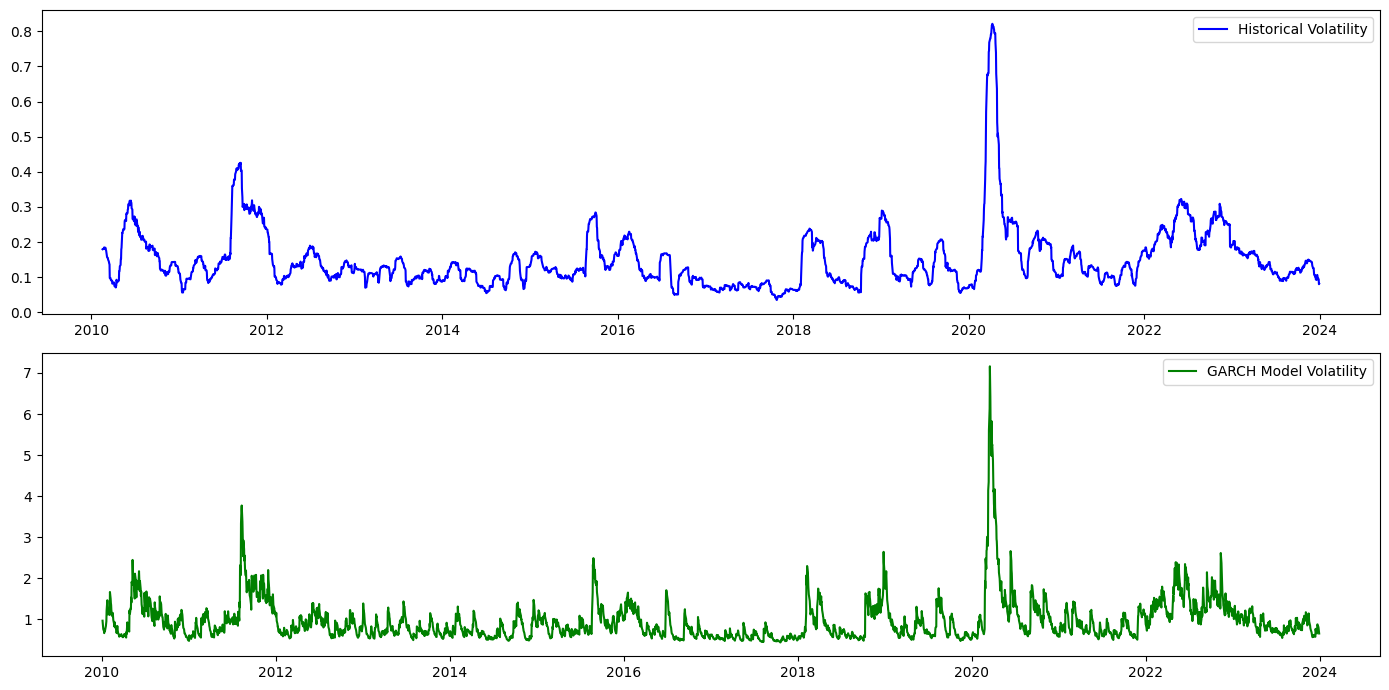

In [67]:
# Plot the results
plt.figure(figsize=(14, 7))

# Plot Historical Volatility
plt.subplot(2, 1, 1)
plt.plot(data['Historical Volatility'], label="Historical Volatility", color='blue')
plt.legend()

# Plot GARCH Model Volatility (using the model's estimated volatility)
plt.subplot(2, 1, 2)
plt.plot(garch_fit.conditional_volatility, label="GARCH Model Volatility", color='green')
plt.legend()

plt.tight_layout()
plt.show()


In [63]:
# Example: Create a Black-Scholes model for options pricing
spot_price = 100
strike_price = 105
interest_rate = 0.05
days_to_expiration = 30
implied_volatility = 0.20  # Example implied volatility

# Create a Black-Scholes process
spot = ql.SimpleQuote(spot_price)
rate = ql.FlatForward(0, ql.NullCalendar(), ql.QuoteHandle(ql.SimpleQuote(interest_rate)), ql.Actual365Fixed())
vol = ql.BlackConstantVol(0, ql.NullCalendar(), ql.QuoteHandle(ql.SimpleQuote(implied_volatility)), ql.Actual365Fixed())

# Price the option
payoff = ql.PlainVanillaPayoff(ql.Option.Call, strike_price)
exercise = ql.EuropeanExercise(ql.Date(15, 1, 2025))

option = ql.VanillaOption(payoff, exercise)
process = ql.BlackScholesProcess(ql.QuoteHandle(spot), ql.YieldTermStructureHandle(rate), ql.BlackVolTermStructureHandle(vol))

option.setPricingEngine(ql.AnalyticEuropeanEngine(process))

# Calculate the option price
option_price = option.NPV()
option_price


1.012865594744186

In [64]:
# Calculate Value-at-Risk (VaR) using historical simulation
VaR_95 = data['Returns'].quantile(0.05)  # 95% confidence level

# Calculate Conditional Value-at-Risk (CVaR)
CVaR_95 = data['Returns'][data['Returns'] <= VaR_95].mean()

VaR_95, CVaR_95


(-0.016674020840575232, -0.02658963324307721)